# Explore Kestrel Segmentations and Features

To install PyAudioAnalysis
```python
pip install pyAudioAnalysis
```

Or developer version

```python
git clone https://github.com/tyiannak/pyAudioAnalysis.git
cd pyAudioAnalysis
pip install -r ./requirements.txt
pip install -e .
cd ..
```

In [1]:
import matplotlib.pyplot as plt
import sound_segmentation

PSeg = sound_segmentation 
from pydub.utils import get_array_type
import array
from pyAudioAnalysis import ShortTermFeatures, MidTermFeatures
from numpy import int16

import os
import pyAudioAnalysis
import numpy as np
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
from scipy.io.wavfile import write
import pandas as pd


<ipython-input-2-1483380e6863>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


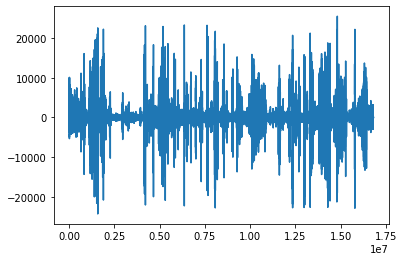

In [2]:
path = os.path.join(os.getcwd(), "../../", "inputs/mp3/mauritius_kestrel.mp3")

(fs,num_a,sound,_) = PSeg.load_data(path)
fig = plt.figure()
plt.plot(num_a)
fig.show()




<ipython-input-3-2f7d1fd48d5f>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


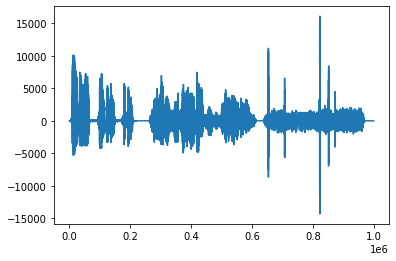

In [3]:
#sound = np.array(sound[0:1000])
#sound = np.transpose(sound)

left = sound.split_to_mono()[0]
bit_depth = left.sample_width * 8

array_type = get_array_type(bit_depth)
num_a = array.array(array_type, left._data)

fig = plt.figure()
plt.plot(num_a[0:1000000])
fig.show()


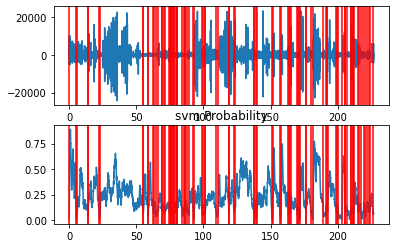

In [5]:
segments = aS.silence_removal(np.array(num_a)[0:10000000], fs, 0.020, 0.020, smooth_window = 1.0, weight = 0.1, plot = True)


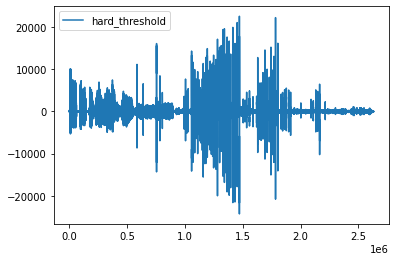

In [6]:

segs_th=[]
for ind,seg in enumerate(segments):
    if ind<6:
        onset = int(seg[0]*fs)
        offset = int(seg[1]*fs)
        wave = num_a[onset:offset]
        segs_th.extend(wave)
fig = plt.figure()
plt.plot(segs_th,label="hard_threshold")

plt.legend()
plt.show()

/home/user/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


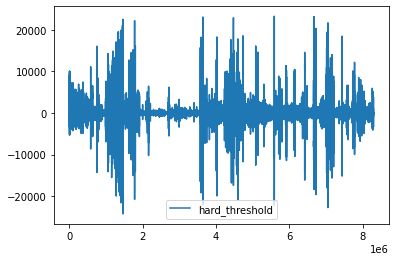

In [7]:

segs_th_trunc=[]
for seg in segments:
    onset = int(seg[0]*fs)
    offset = int(seg[1]*fs)
    wave = num_a[onset:offset]
    segs_th_trunc.extend(wave)
fig = plt.figure()
plt.plot(segs_th_trunc,label="hard_threshold")

plt.legend()
plt.show()    




In [8]:
write("../kestrel_segs_th.wav", fs, int16(segs_th))


In [9]:
!ls ../../outputs/kestrel_segs_th.wav
!du -h ../../outputs/kestrel_segs_th.wav

../../outputs/kestrel_segs_th.wav
16M	../../outputs/kestrel_segs_th.wav


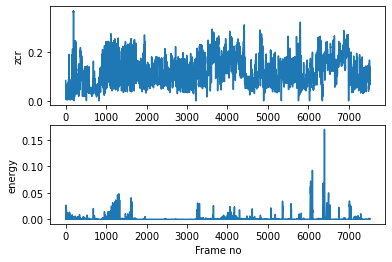

In [10]:
#from pyAudioAnalysis import audioBasicIO
F, f_names = ShortTermFeatures.feature_extraction(segs_th, fs, 0.050*fs, 0.025*fs)
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

In [11]:

df = pd.DataFrame([{ff_names:np.sum(ff) for ff, ff_names in zip(F, f_names)}])
df=df.T
df

,0
zcr,874.501815
energy,11.320993
energy_entropy,22973.285590
spectral_centroid,1399.548487
spectral_spread,1307.048027
...,...
delta chroma_9,-0.000946
delta chroma_10,-0.010916
delta chroma_11,-0.011906
delta chroma_12,0.001418


In [12]:
midFeat,shortFeat,midFeatLabels=MidTermFeatures.mid_feature_extraction(
    segs_th, fs,
    0.43*fs, 0.43*fs,
    0.16*fs, 0.16*fs
)

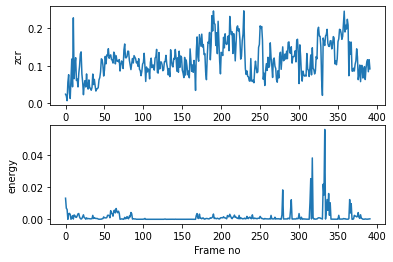

In [13]:
F = midFeat
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

In [14]:
df = pd.DataFrame([{ff_names:np.sum(ff) for ff, ff_names in zip(midFeat, midFeatLabels)}])
df=df.T
df

,0
zcr_mean,45.541909
energy_mean,0.589337
energy_entropy_mean,1106.842049
spectral_centroid_mean,74.595856
spectral_spread_mean,64.510103
...,...
delta chroma_9_std,7.914741
delta chroma_10_std,3.012728
delta chroma_11_std,5.746550
delta chroma_12_std,3.000916
